In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.utils import resample

In [2]:
df = pd.read_csv('../creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Downsampling

legit = df[df.Class == 0]
fraud = df[df.Class == 1]

In [4]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [8]:
x=df.drop('Class',axis=1)
y=df['Class']

In [9]:
scaler=StandardScaler()

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [11]:
print(x_train.shape,y_train.shape)

(213605, 30) (213605,)


In [13]:
print(x_test.shape,y_test.shape)

(71202, 30) (71202,)


In [15]:
model=Sequential()
model.add(LSTM(64,input_shape=(x_train.shape[1],1),activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [16]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [20]:
r,c=x_train.shape
print(r,c)

213605 30


In [22]:
x_train=x_train.to_numpy()

In [23]:
x_train=x_train.reshape(r,c,1)

In [36]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 16961 (66.25 KB)
Trainable params: 16961 (66.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [25]:
modelhistory=model.fit(x_train,y_train,epochs=20,batch_size=64,verbose=1)

Epoch 1/20
3338/3338 [==============================] - 48s 14ms/step - loss: 1.5068 - accuracy: 0.9966
Epoch 2/20
3338/3338 [==============================] - 50s 15ms/step - loss: 2.4850 - accuracy: 0.9964
Epoch 3/20
3338/3338 [==============================] - 94s 28ms/step - loss: 6.2634 - accuracy: 0.9971
Epoch 4/20
3338/3338 [==============================] - 78s 23ms/step - loss: 10.9499 - accuracy: 0.9960
Epoch 5/20
3338/3338 [==============================] - 50s 15ms/step - loss: 10.4469 - accuracy: 0.9960
Epoch 6/20
3338/3338 [==============================] - 51s 15ms/step - loss: 8.8742 - accuracy: 0.9966
Epoch 7/20
3338/3338 [==============================] - 53s 16ms/step - loss: 2.7487 - accuracy: 0.9963
Epoch 8/20
3338/3338 [==============================] - 51s 15ms/step - loss: 58.7877 - accuracy: 0.9963
Epoch 9/20
3338/3338 [==============================] - 52s 15ms/step - loss: 25.3215 - accuracy: 0.9962
Epoch 10/20
3338/3338 [==============================] - 49s

In [26]:
model.save("LSTM_model.keras")

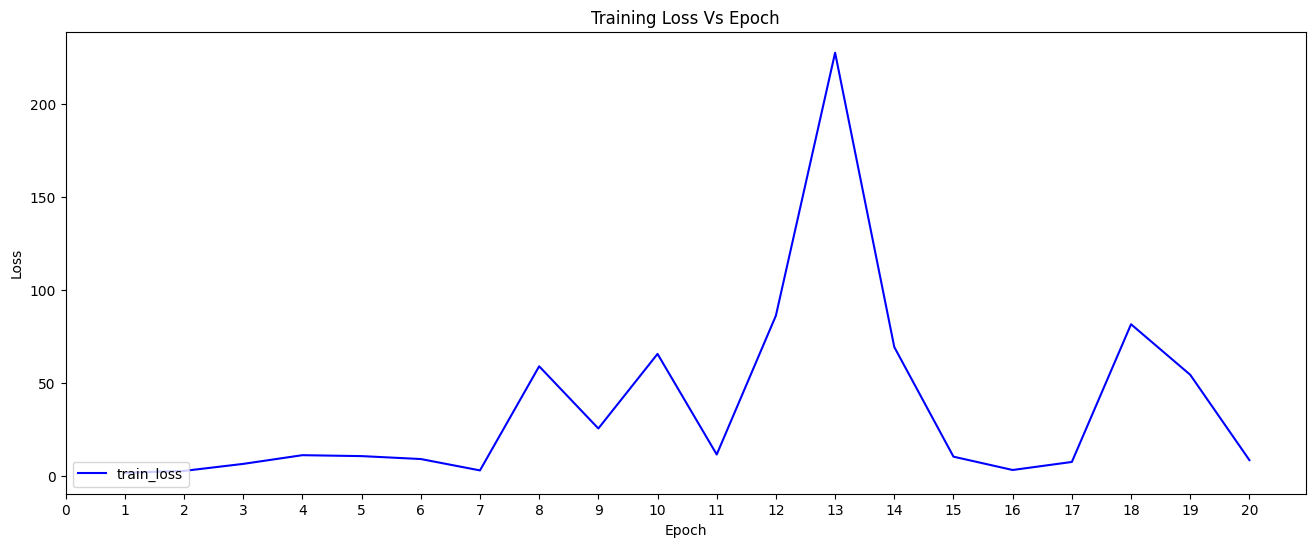

In [35]:
epc=20

myarr=np.arange(0, 20, 1)
myarr=np.append(myarr,20)

plt.plot(np.arange(1,epc+1), modelhistory.history["loss"], label="train_loss", color='blue')
plt.title("Training Loss Vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.xticks(myarr)
plt.legend(loc="lower left")
plt.rcParams['figure.figsize']=(16,6)
plt.show()

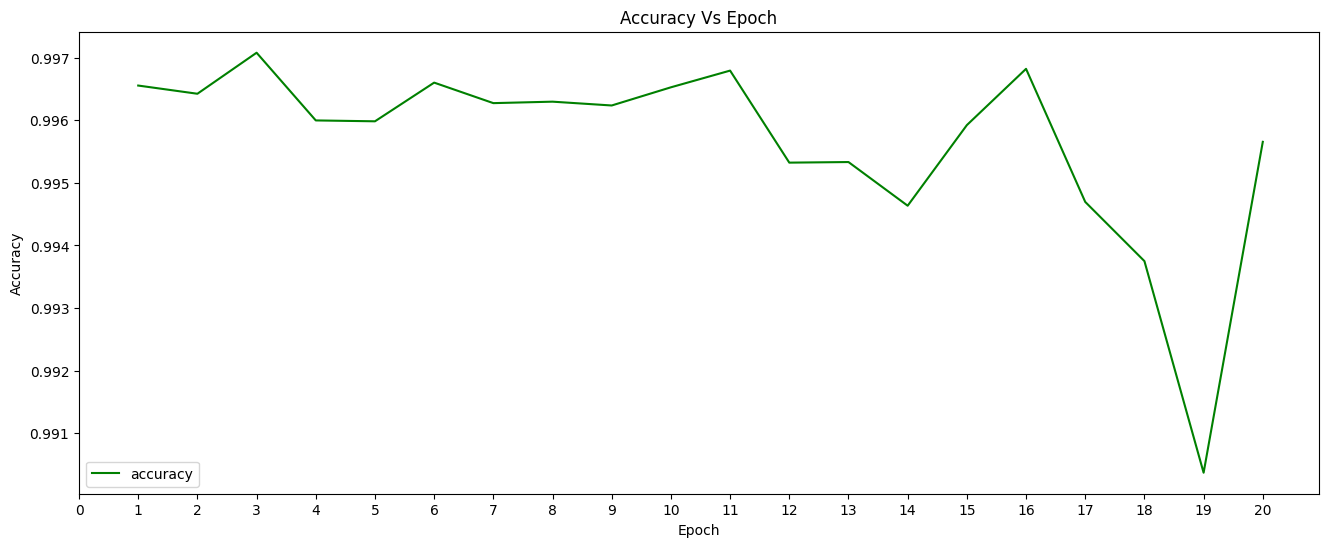

In [28]:
plt.plot(np.arange(1, epc+1), modelhistory.history["accuracy"], label="accuracy", color='green')
plt.title("Accuracy Vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.xticks(myarr)
plt.legend(loc="lower left")
plt.rcParams['figure.figsize']=(16,6)
plt.show()

In [30]:
y_train_pred=model.predict(x_train)

6676/6676 [==============================] - 33s 5ms/step


In [31]:
y_train_pred=(y_train_pred>0.5).astype(int)

In [32]:
print("Accuracy on Training Data : ",accuracy_score(y_train,y_train_pred))

Accuracy on Training Data :  0.9980899323517708


In [33]:
print("Classification Report :\n",classification_report(y_train_pred,y_train))

Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    213576
           1       0.00      0.00      0.00        29

    accuracy                           1.00    213605
   macro avg       0.50      0.50      0.50    213605
weighted avg       1.00      1.00      1.00    213605



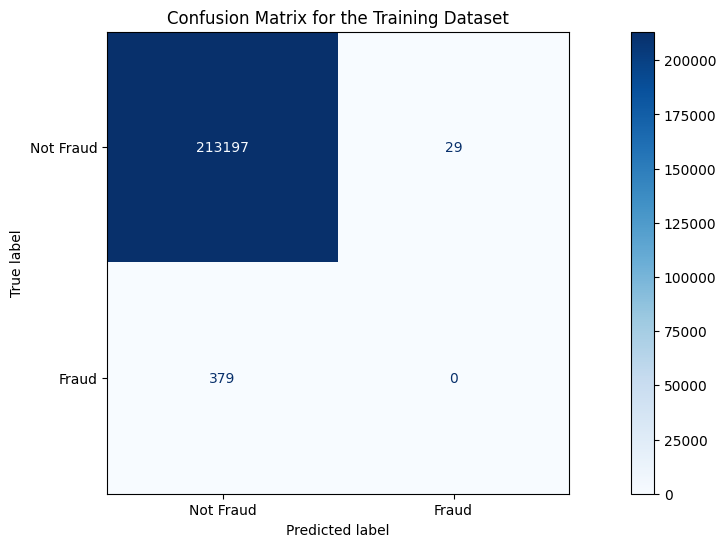

In [34]:
cm = confusion_matrix(y_train, y_train_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Not Fraud', 'Fraud'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for the Training Dataset')
plt.show();